In [ ]:
"""
This file is the entry point for the project
"""
# Begin by importing external libraries using path_setup
# NOTE : Must be ran first, thus PEP8-E402
import path_setup
path_setup.path_setup()
import sys  # noqa E402
import matplotlib.pyplot as plt # noqa E402
import numpy as np # noqa E402
import datetime as dt # noqa E402
from LatticeClass_F import lattice_class as lt # noqa E402
import PrintException as PE  # noqa E402
import input_funcs as inF  # noqa E402
from random import random  # noqa E402
import time
# Shebang line for interactive output in vs_code, comment this out if you have troubles running the notebook\n",
# %matplotlib widget

def rand_time() -> int:
    out = int(dt.datetime.now().strftime('%s'))
    sys.stdout.write(f"Time Seed = {out}\n")
    return(int(dt.datetime.now().strftime('%s')))

# Setup
This is the setup for the simulation.

# Parameters
## N, M
> The span of the basis vectors

## $\beta J$'s
> The temperature

# Options 0 and 1
0 for seeded random or 1 for time based
## Seeded random : 0
> seeds random with 1644121893 by default to generate a repeatable test.
## Time based : 1
> seeds radom with the current epoch time as an integer.

# TODO
It shouldnt be hard to include external magnetic field interactions

In [2]:
# 32x32 runs in about 40-70 seconds depending on your system.
N = 32
M = 32
BJs = np.arange(0.1, 2, 0.05)
total_time = 1000
BJ = 0.1

size = [N, M]
lt_a = lt(1, size)
lt_b = lt(1, size, [[1, 0], [0.5, np.sqrt(3)/2]])
lt_c = lt(1, size, [[0.5, np.sqrt(3)/2], [0.5, -np.sqrt(3)/2]])
# lt_d = lt(1, size, [[0.128, np.e], [3.02398, -np.e]])

output = input('Enter 0 for seeded random or 1 for time based:')
if output == '0':
    print("option 0 chosen..\n")
    # DOCtest seed = 1644121893
    seed = 1644121893
    
    lt_a.randomize(voids=True, probs=[0.25, 0.4], rand_seed=seed,
                    quiet=False)
    lt_b.randomize(voids=True, probs=[0.25, 0.4], rand_seed=seed,
                    quiet=True)
    lt_c.randomize(voids=True, probs=[0.25, 0.4], rand_seed=seed,
                    quiet=True)
    # lt_d.randomize(voids=True, probs=[0.25, 0.4], rand_seed=seed,
    #                quiet=True)

else:
    print("option 1 chosen.\n")

    lt_a.randomize(voids=True, probs=[
        random(), random()],
        rand_seed=rand_time(), quiet=False)

    lt_b.randomize(voids=False, probs=[
            random(), random()],
            rand_seed=rand_time(), quiet=False)

    lt_c.randomize(voids=False, probs=[
            random(), random()],
            rand_seed=rand_time(), quiet=False)

    # lt_d.randomize(voids=False, probs=[
    #      random(), random()],
    #      rand_seed=rand_time(), quiet=False)

 Generation complete!                                                                                                             
 Generation complete!                                                                                                             
 Generation complete!                                                                                                             
option 0 chosen..

Generating Seed = 1644121893                                                                                                      


# Display
Calling <lattice_object>.display() will display the current spin arangement of the lattice_object.

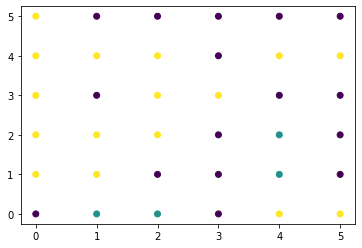

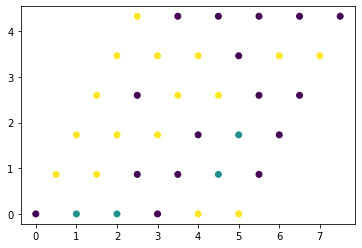

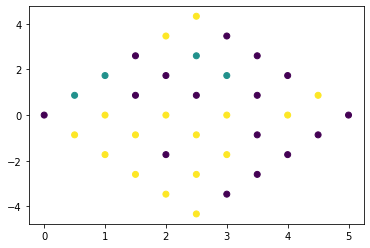

In [3]:
lt_a.display()
lt_b.display()
lt_c.display()
# lt_d.display()

# Metropolis Algorithm test
Uncomment if you want to test these. The metropolis algorithm gets ran anyways in the next section.

Metropolis Algorithm complete!                                                                                                    

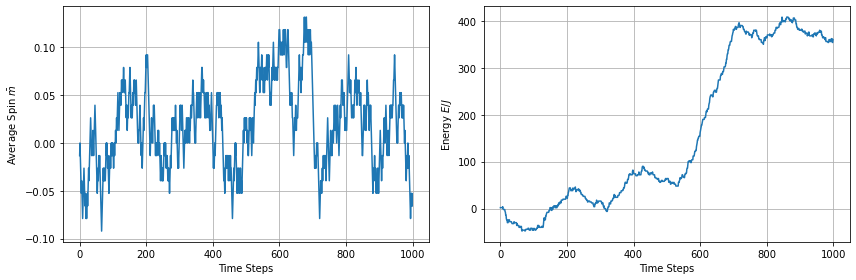

Metropolis Algorithm complete!                                                                                                    

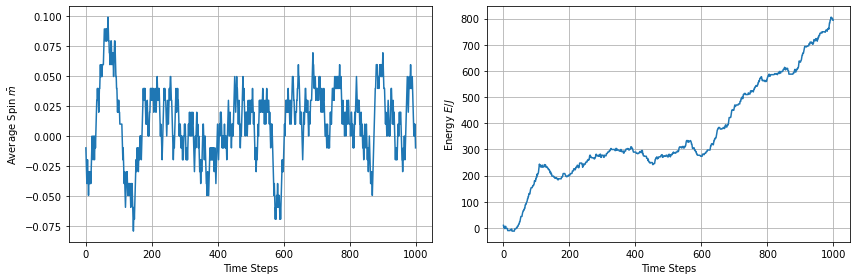

Metropolis Algorithm complete!                                                                                                    

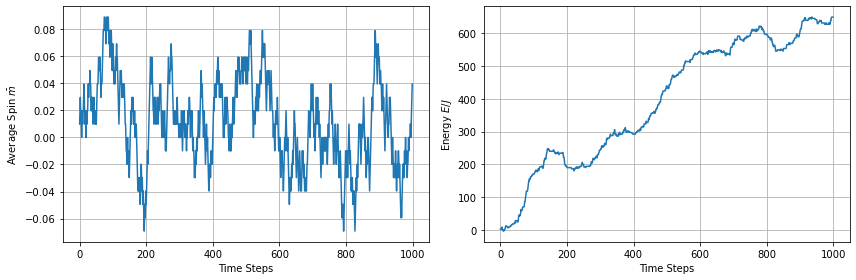

array([[  2.,   2.],
       [  4.,   2.],
       [  6.,   2.],
       ...,
       [  4., 650.],
       [  6., 650.],
       [  8., 650.]])

In [4]:
# Uncomment the next 4 lines below if you want, but not
# really a reason to as the metropolis algorithm gets
# called anyways from the get_spin_energy function.
lt_a.metropolis(total_time, BJ, progress=True,
                save=False, auto_plot=True);
lt_b.metropolis(total_time, BJ, progress=True,
                save=False, auto_plot=True);
lt_c.metropolis(total_time, BJ, progress=True,
                save=False, auto_plot=True);
# lt_d.metropolis(total_time, BJ, progress=True,
#                 save=False, auto_plot=True)

# Plotting Energy-Temperature relations
Can look at $\bar{m}$ as a function of temperature:
$$ T = 1/\beta k = J/(\beta J)k $$

We can also plot heat capacity as a function of time, using:

$$C_V = \sigma_E^2 / T^2 $$

$$= (\left<E^2\right>-\left<E\right>^2) \cdot \beta^{2} k^2$$

$$= \left(\left<\left(\frac{E}{J}\right)^2\right>-\left<\frac{E}{J}\right>^2 \right) \cdot (\beta J)^{2} k^2 $$

$$= \sigma_{E/J}^2 \cdot (\beta J)^{2} k^2$$

## Whats going on
The get_spin_genery function runs the Metropolis algorithm and finds a viable equlibrium temperature for a given $\beta J$ value, plotting 38
 runs of the metropolis algorithm chained together.

Then, we use the above relations to first plot $\hat{m}$ vs $\left(\frac{k}{J}\right)T$ -- where $\hat{m}$ the Sum of Spins over the number of spins.

Again using the above relations we can also plot $C_V / k^2$ vs $\left(\frac{k}{J}\right)T$.


In [5]:
a, b, c = lt_a.get_spin_energy(BJs, total_time, save=False,
                               auto_plot=True)

get_spin_energy is 84.2% complete...                                                                                              

In [ ]:
a, b, c = lt_b.get_spin_energy(BJs, total_time, save=False,
                               auto_plot=True)

In [ ]:
a, b, c = lt_c.get_spin_energy(BJs, total_time, save=False,
                               auto_plot=True)

In [ ]:
# a, b, c = lt_d.get_spin_energy(BJs, total_time, save=False,
#                                auto_plot=True)